# ДОМАШНЯЯ РАБОТА 2

РЕЩАЮЩИЕ ДЕРЕВЬЯ И ВАЖНОСТЬ ПРИЗНАКОВ

ДАНИЛЬЧЕНКО ВАДИМ

In [24]:
"""
1.Загрузите выборку из файла titanic.csv с помощью пакета Pandas.
2.Оставьте в выборке четыре признака: класс пассажира (Pclass), цену билета (Fare), возраст пассажира (Age) и его пол (Sex).
3.Обратите внимание, что признак Sex имеет строковые значения.
4.Выделите целевую переменную — она записана в столбце Survived.
5.В данных есть пропущенные значения — например, для некоторых пассажиров неизвестен их возраст. 
Такие записи при чтении их в pandas принимают значение nan. Найдите все объекты, у которых есть пропущенные признаки, 
и удалите их из выборки.
6.Обучите решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию (речь идет о параметрах 
конструктора DecisionTreeСlassifier).
7.Вычислите важности признаков и найдите два признака с наибольшей важностью. Их названия будут ответами для данной задачи 
(в качестве ответа укажите названия признаков через запятую или пробел, порядок не важен).
дополнительно - визуализировать разделяющую поверхность.
"""

'\n1.Загрузите выборку из файла titanic.csv с помощью пакета Pandas.\n2.Оставьте в выборке четыре признака: класс пассажира (Pclass), цену билета (Fare), возраст пассажира (Age) и его пол (Sex).\n3.Обратите внимание, что признак Sex имеет строковые значения.\n4.Выделите целевую переменную — она записана в столбце Survived.\n5.В данных есть пропущенные значения — например, для некоторых пассажиров неизвестен их возраст. \nТакие записи при чтении их в pandas принимают значение nan. Найдите все объекты, у которых есть пропущенные признаки, \nи удалите их из выборки.\n6.Обучите решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию (речь идет о параметрах \nконструктора DecisionTreeСlassifier).\n7.Вычислите важности признаков и найдите два признака с наибольшей важностью. Их названия будут ответами для данной задачи \n(в качестве ответа укажите названия признаков через запятую или пробел, порядок не важен).\n'

In [2]:
import pandas as pd
df=pd.read_csv('titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#преобразуем пол в 0-женский и 1-мужской
def change_gender(gender):
    if gender=='female':
        return 0
    elif gender=='male':
        return 1
df['Gender']=df.Sex.apply(change_gender, 1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [4]:
# создадим датасет по интересующим нас данным и удалим пропуски (nan)
df_test=df.filter(items=['Pclass','Fare', 'Age', 'Gender', 'Survived']).dropna()

In [5]:
# импортируем нужные библиотеки
from sklearn.tree import DecisionTreeClassifier

# зададим предикторы 
X = df_test.filter(items=['Pclass','Fare', 'Age', 'Gender'])
# также укажем целевую перенную
y = df_test.Survived

# создадим и обучим решающее дерево
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, y)

# вычислим важность признаков
importances = clf.feature_importances_
importances

array([0.14000522, 0.30343647, 0.2560461 , 0.30051221])

ВИДИМ, ЧТО ДВА ПРИЗНАКА С МАКСИМАЛЬНОЙ ВАЖНОСТЬЮ - 2й FARE и 4й GENDER(в оригинале SEX)

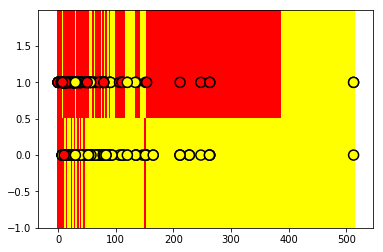

In [6]:
# визуализируем классификацию по нашим признакам (по Y - пол, по Х - цена билета), красным цветом не выжившие
import numpy as np
import matplotlib.pyplot as plt
def get_grid(data):
    x_min, x_max = df_test['Fare'].min() - 1, df_test['Fare'].max() + 1
    y_min, y_max = df_test['Gender'].min() - 1, df_test['Gender'].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


X = df_test.filter(items=['Fare','Gender'])
y = df_test.Survived
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, y)

# отобразим разделяющую поверхность
xx, yy = get_grid(X)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(df_test['Fare'], df_test['Gender'], c=df_test['Survived'], s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);